# Analysis of pRRx/pRRx% properties in AF detection

## 1. Data preparation

In [ ]:
import prepare_data

In [ ]:
# 1. Save QRS locations of continuous AF and SR segments to CSV files
for db in ['ltafdb', 'afdb']:
    rec_dir = f'../data/raw/{db}/1.0.0'
    prepare_data.prepare_qrs(rec_dir, db)
# 2. Calculate pRRx and pRRx%
x_sec = 60  # Length of RR segments [s]
for db, fs in [['ltafdb', 128], ['afdb', 128]]:
    prepare_data.prepare_prrx(
        db, fs, x_sec,
        qrs_dir='../data/interim',
        prrx_dir='../data/processed')

## 2. Distribution analysis
For each pRRx/pRRx%, plot:
* median
* range from 25th to 75th percentile
* range from 10th to 90th percentile

In [1]:
import os
import distribution
import helper

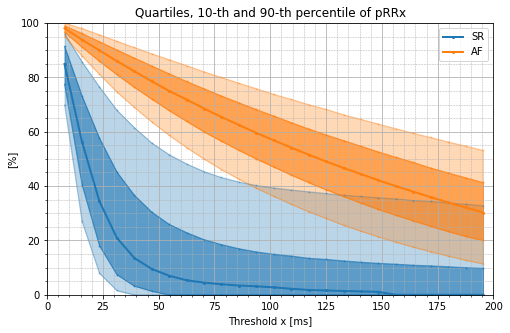

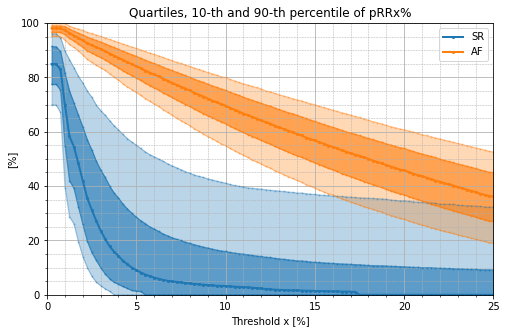

In [2]:
prrx_dir = '../data/processed'
fig_dir = '../reports/images/distr'
x_sec = 60
db = 'ltafdb'
df = helper.read_prrx(prrx_dir, db, x_sec)
perc_dict = distribution.calc_percentiles(df)
if not os.path.exists(fig_dir):
    os.makedirs(os.path.join(fig_dir))
distribution.plot_distr(perc_dict, db, x_sec, fig_dir)

## 3. ROC analysis

For each pRRx/pRRx%, using reveiver operating characteristic (ROC) curve, calculate:
* area under curve (AUC)
* optimal cutoff using Youden's criterion

In [3]:
import os
from roc_analysis import auc_prrx_to_excel, cutoff_prrx_to_excel, plot_auc, plot_cutoff

pRRx


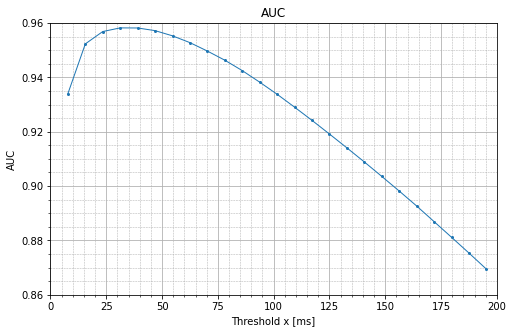

pRRx%


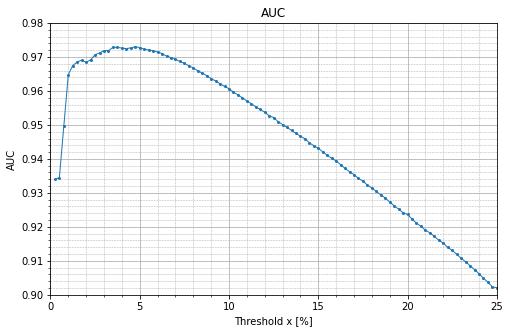

In [4]:
prrx_dir = '../data/processed'
roc_dir = '../reports/excel/roc'
fig_dir = '../reports/images/roc'
x_sec = 60
db = 'ltafdb'
if not os.path.exists(roc_dir):
    os.makedirs(os.path.join(roc_dir))
if not os.path.exists(fig_dir):
    os.makedirs(os.path.join(fig_dir))
# 1. Calculate and save AUC
auc_prrx_to_excel(prrx_dir, db, x_sec, roc_dir)
# 2. Plot AUC
plot_auc(roc_dir, db, x_sec, fig_dir)

pRRx


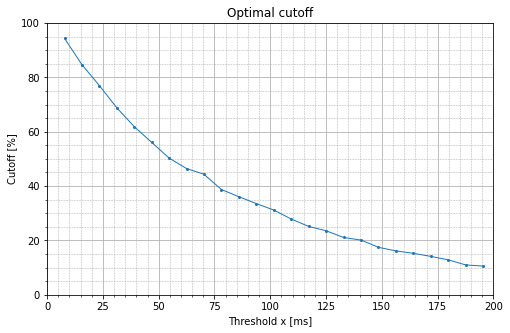

pRRx%


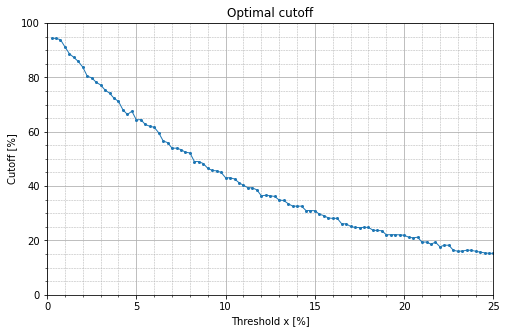

In [5]:
# 2. Calculate and save optimal cutoffs
cutoff_prrx_to_excel(
    prrx_dir, db, method='youden', x_sec=60, cutoff_dir=roc_dir)
# 4. Plot cutoffs
plot_cutoff(roc_dir, db, x_sec, 'youden', fig_dir)

## 4. Classify RR series as AF or SR

* Using optimal cutoffs, classify the dataset (LTAFDB)
    * nonparametric bootstrap - random subsets of the database are chosen N times
    * Calculate classification metrics
    * Calculate 95% CI for each metric
    * Plot the results
    * Compare distributions of classification metrics for
        * pRR31 and pRR3.25%
        * pRR50 and pRR31
* Classify the test set (AFDB) using cutoffs from the training set (LTAFDB)
    * compare results with the training set
    * other analyses as in the training set

In [1]:
import bootstrap as boot

LTAFDB (pRRx), iter 5000 / 5000
LTAFDB (pRRx%), iter 5000 / 5000


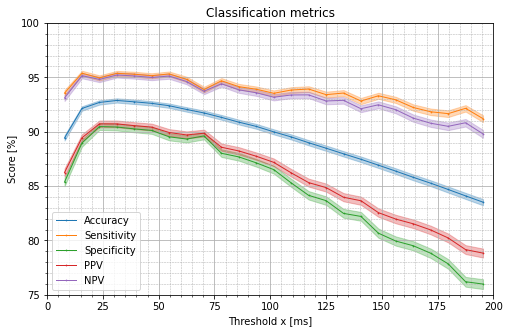

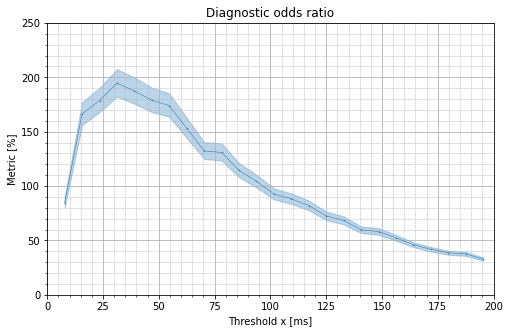

Accuracy is highest for pRR31.25 (92.88)
 and lowest for pRR195.3125 (83.52).
 For pRR7.8125 Accuracy is 89.42 and for pRR195.3125 it is 83.52
Sensitivity is highest for pRR15.625 (95.38)
 and lowest for pRR195.3125 (91.20).
 For pRR7.8125 Sensitivity is 93.55 and for pRR195.3125 it is 91.20
Specificity is highest for pRR23.4375 (90.47)
 and lowest for pRR195.3125 (75.99).
 For pRR7.8125 Specificity is 85.37 and for pRR195.3125 it is 75.99
PPV is highest for pRR23.4375 (90.72)
 and lowest for pRR195.3125 (78.84).
 For pRR7.8125 PPV is 86.25 and for pRR195.3125 it is 78.84
NPV is highest for pRR31.25 (95.22)
 and lowest for pRR195.3125 (89.80).
 For pRR7.8125 NPV is 93.10 and for pRR195.3125 it is 89.80
F1-score is highest for pRR31.25 (92.99)
 and lowest for pRR195.3125 (84.57).
 For pRR7.8125 F1-score is 89.75 and for pRR195.3125 it is 84.57
DOR is highest for pRR31.25 (194.65)
 and lowest for pRR195.3125 (32.80).
 For pRR7.8125 DOR is 84.65 and for pRR195.3125 it is 32.80


C:\Users\bussz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


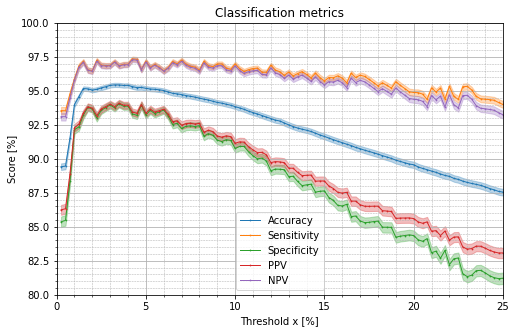

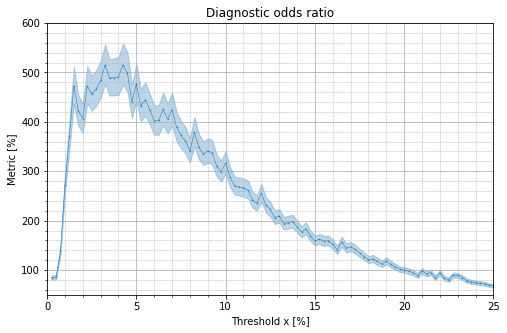

Accuracy is highest for pRR3.25% (95.44)
 and lowest for pRR25.0% (87.55).
 For pRR0.25% Accuracy is 89.42 and for pRR25.0% it is 87.55
Sensitivity is highest for pRR4.25% (97.36)
 and lowest for pRR0.5% (93.54).
 For pRR0.25% Sensitivity is 93.56 and for pRR25.0% it is 94.00
Specificity is highest for pRR3.5% (94.04)
 and lowest for pRR24.75% (81.19).
 For pRR0.25% Specificity is 85.37 and for pRR25.0% it is 81.22
PPV is highest for pRR3.5% (94.10)
 and lowest for pRR24.75% (83.08).
 For pRR0.25% PPV is 86.25 and for pRR25.0% it is 83.08
NPV is highest for pRR4.25% (97.30)
 and lowest for pRR0.5% (93.10).
 For pRR0.25% NPV is 93.11 and for pRR25.0% it is 93.25
F1-score is highest for pRR3.25% (95.48)
 and lowest for pRR25.0% (88.21).
 For pRR0.25% F1-score is 89.75 and for pRR25.0% it is 88.21
DOR is highest for pRR4.25% (515.02)
 and lowest for pRR25.0% (67.81).
 For pRR0.25% DOR is 84.75 and for pRR25.0% it is 67.81


In [7]:
N = 5000
prrx_dir = '../data/processed'
cutoff_dir = '../reports/excel/roc'
x_sec = 60
cutoff_method = 'youden'
boot_dir = '../reports/excel/boot'
fig_dir = '../reports/images/boot'
db = 'ltafdb'
# 1. Bootstrap - classification (train set)
boot.bootstrap(prrx_dir, cutoff_dir, db, x_sec, cutoff_method, N,
            boot_dir)
for group in ['pRRx', 'pRRx%']:
    boot.calculate_95ci(boot_dir, db, x_sec, N, group, cutoff_method)
    boot.plot_boot(db, group, N, x_sec, boot_dir, fig_dir)
    boot.describe_median_results(db, group, N, x_sec, boot_dir)
    boot.test_diff_significance(db, group, N, 'all', x_sec, boot_dir, cutoff_method)

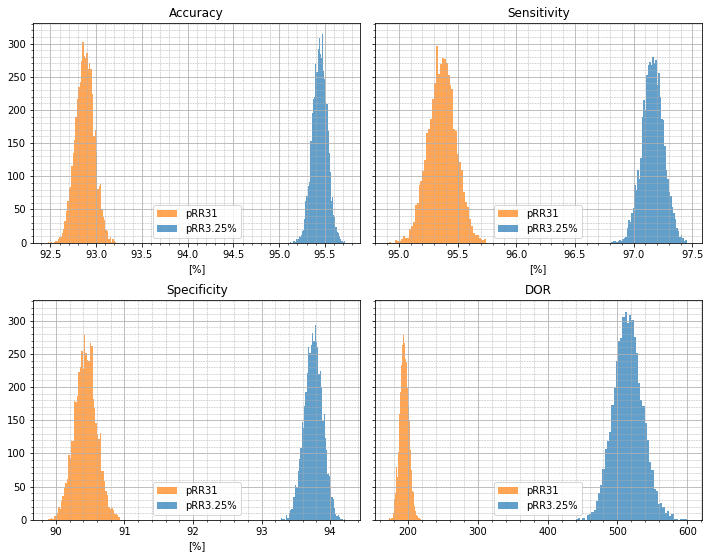

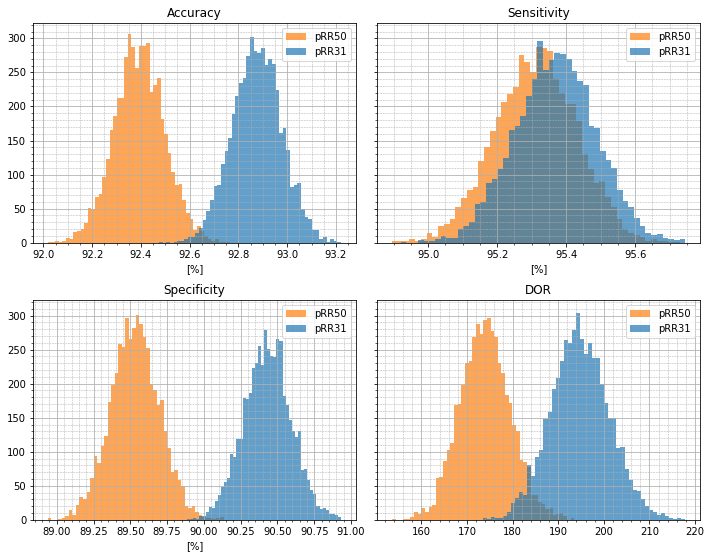

In [8]:
# 2. Compare distributions of metrics from bootstrap
# pRR3.25% vs pRR31
boot.plot_compare_scores_distr(
    db, group_param_label=(('pRRx', 'pRR31.25', 'pRR31'),
                           ('pRRx%', 'pRR3.25%', 'pRR3.25%')),
    cutoff_method=cutoff_method, N=N, x_sec=x_sec,
    boot_dir=boot_dir, fig_dir=fig_dir)
# pRR31 vs pRR50
boot.plot_compare_scores_distr(
    db, group_param_label=(('pRRx', 'pRR54.6875', 'pRR50'),
                           ('pRRx', 'pRR31.25', 'pRR31')),
    cutoff_method=cutoff_method, N=N, x_sec=x_sec,
    boot_dir=boot_dir, fig_dir=fig_dir)

Train: LTAFDB, test: AFDB (pRRx), iter 5000 / 5000
Train: LTAFDB, test: AFDB (pRRx%), iter 5000 / 5000
pRRx


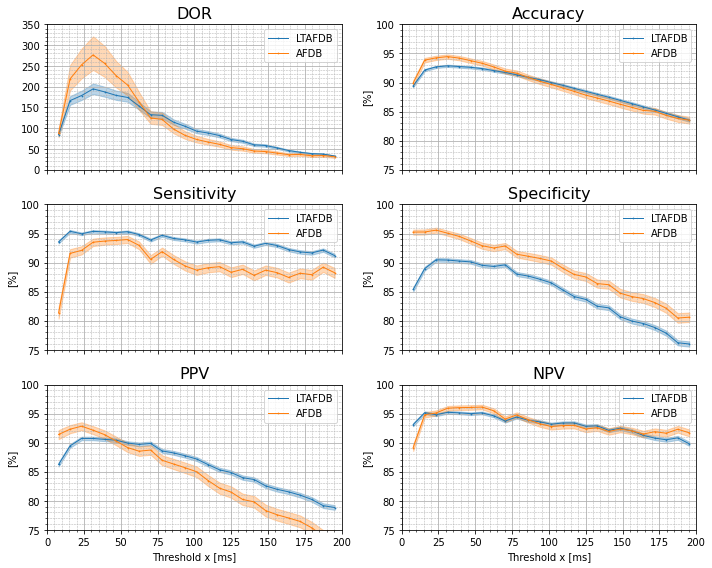

C:\Users\bussz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


pRRx%


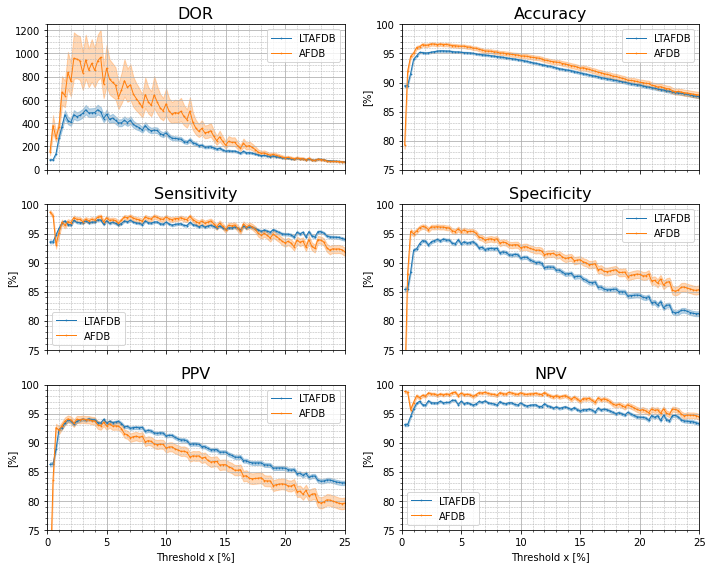

In [2]:
N = 5000
prrx_dir = '../data/processed'
cutoff_dir = '../reports/excel/roc'
x_sec = 60
cutoff_method = 'youden'
boot_dir = '../reports/excel/boot'
fig_dir = '../reports/images/boot'
db = 'ltafdb'
# 3. Bootstrap - classification (test set)
boot.boot_test_set(
    db_train='ltafdb', db_test='afdb', cutoff_method=cutoff_method, N=N,
    x_sec=x_sec, cutoff_dir=cutoff_dir, prrx_dir=prrx_dir,
    boot_dir=boot_dir)
# 4. Plot train and test set results
for group in ['pRRx', 'pRRx%']:
    boot.calculate_95ci(boot_dir, 'train_ltafdb_test_afdb', x_sec, N, group,
                    cutoff_method)
    print(group)
    boot.plot_boot_train_vs_test(
        'ltafdb', 'afdb', group, N, x_sec, boot_dir, fig_dir)

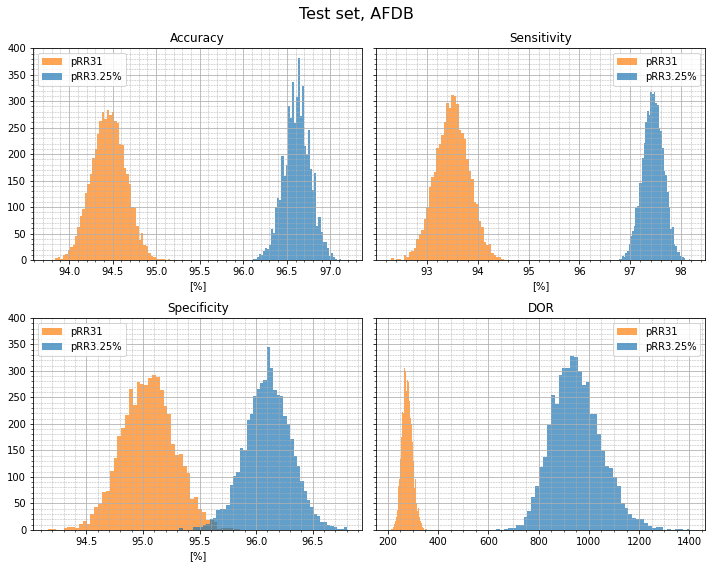

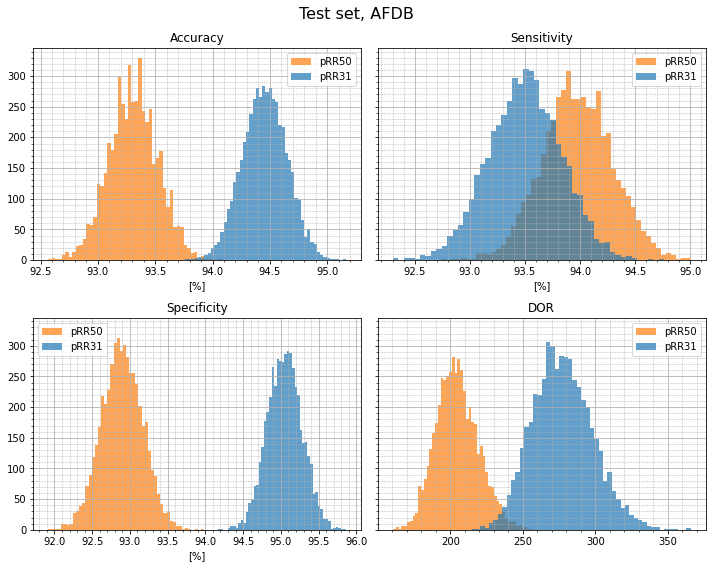

In [3]:
# 5. Compare distributions of metrics from bootstrap (test set)
# pRR3.25% vs pRR31
boot.plot_compare_scores_distr(
    db='train_ltafdb_test_afdb',
    group_param_label=(('pRRx', 'pRR31.25', 'pRR31'),
                        ('pRRx%', 'pRR3.25%', 'pRR3.25%')),
    cutoff_method=cutoff_method, N=N, x_sec=x_sec,
    boot_dir=boot_dir, fig_dir=fig_dir,
    suptitle='Test set, AFDB')
# pRR31 vs pRR50
boot.plot_compare_scores_distr(
    db='train_ltafdb_test_afdb',
    group_param_label=(('pRRx', 'pRR54.6875', 'pRR50'),
                        ('pRRx', 'pRR31.25', 'pRR31')),
    cutoff_method=cutoff_method, N=N, x_sec=x_sec,
    boot_dir=boot_dir, fig_dir=fig_dir,
    suptitle='Test set, AFDB')